In [3]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action = "ignore") 


# **Loading Dataset**

In [4]:
#Loading Dataset
covid = pd.read_csv(r'Covid Dataset.csv')
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [5]:
#To check Null Value in Dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [6]:
#To check columns name in dataset
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [7]:
#To count number of Yes and No in Covide-19 column
covid['COVID-19'].value_counts()

COVID-19
Yes    4383
No     1051
Name: count, dtype: int64

**We can see that the dataset is imbalance**

# **Data Vizualisation**

<Axes: xlabel='COVID-19', ylabel='count'>

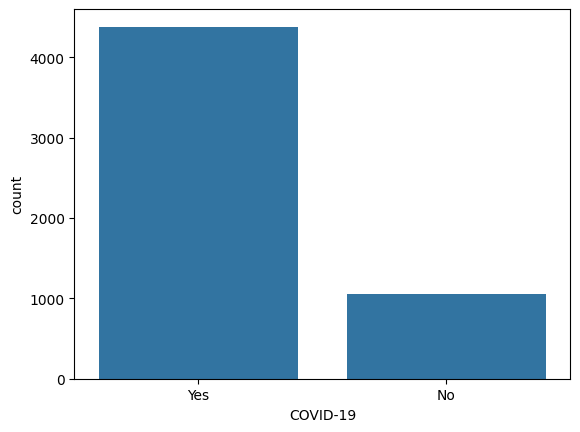

In [8]:
#Distribution of target variable
sns.countplot(x='COVID-19',data=covid)

Text(0.5, 1.0, 'Percentage of COVID Positive')

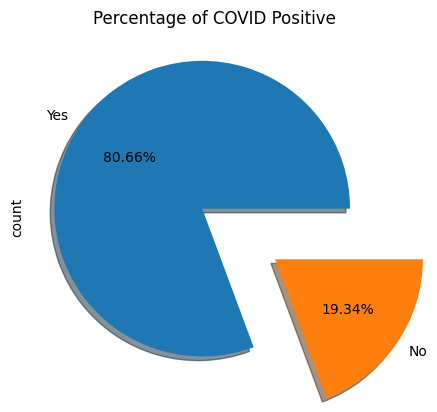

In [9]:
#Distribution of target variable (COVID-19) in percentage
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.5],autopct='%1.2f%%',shadow=True)
plt.title('Percentage of COVID Positive')

In [10]:
#Selecting features
features = covid.columns.tolist()
features.remove('COVID-19')
print(features)

['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']


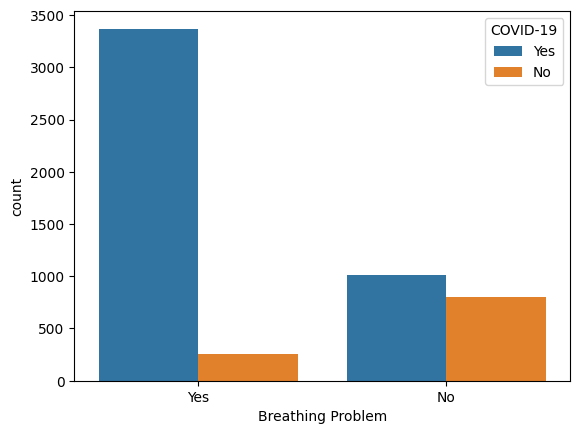

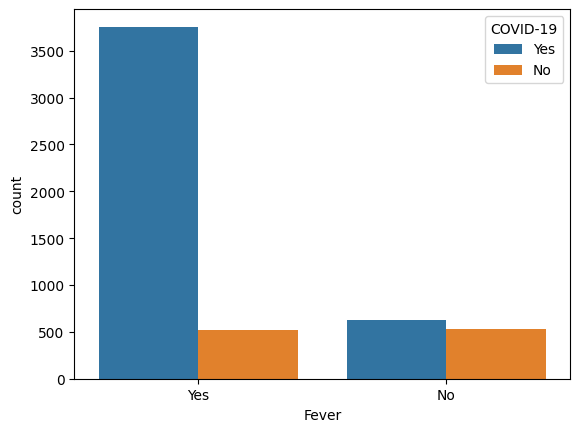

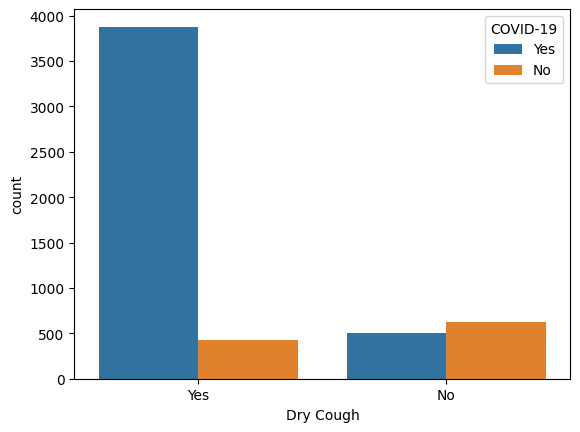

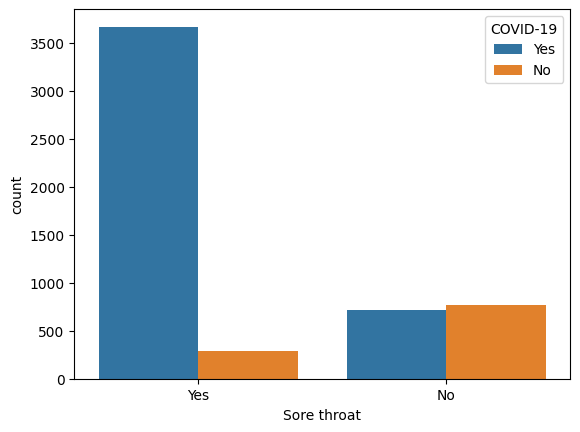

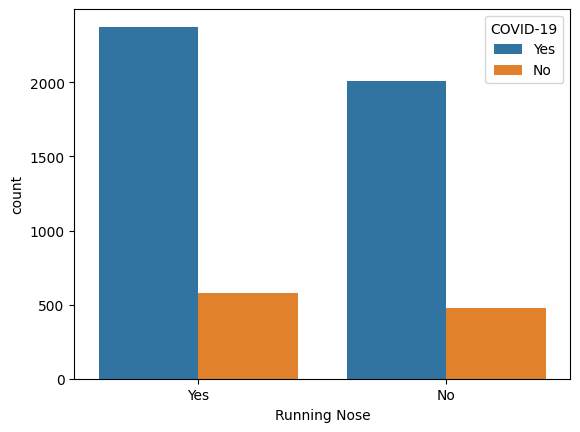

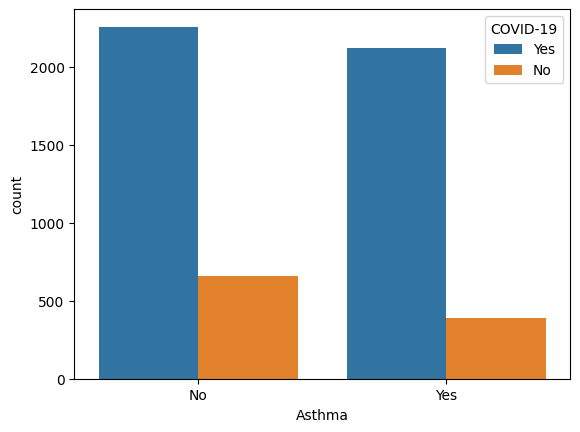

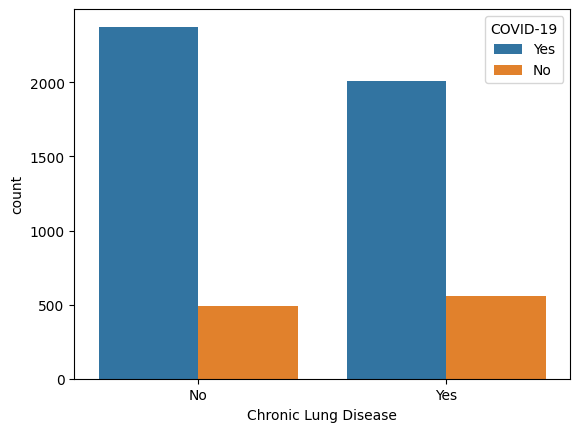

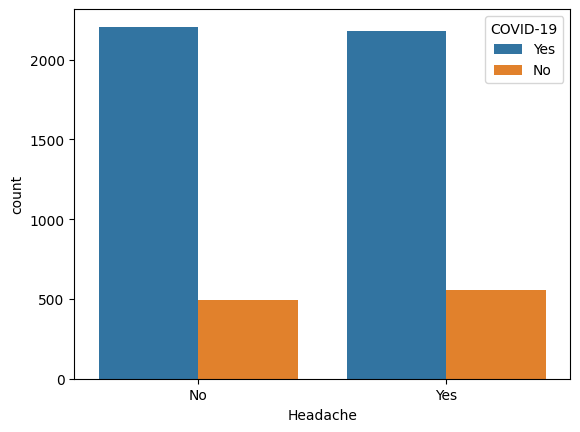

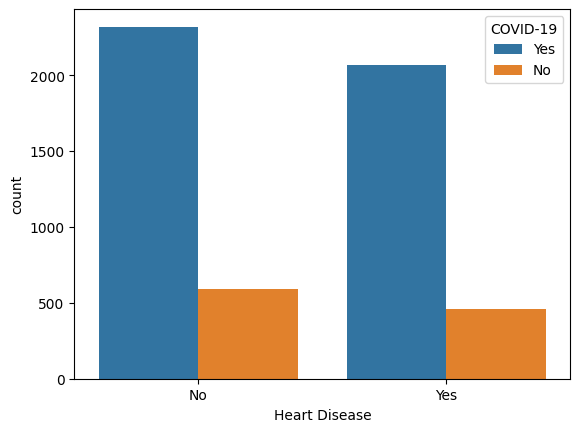

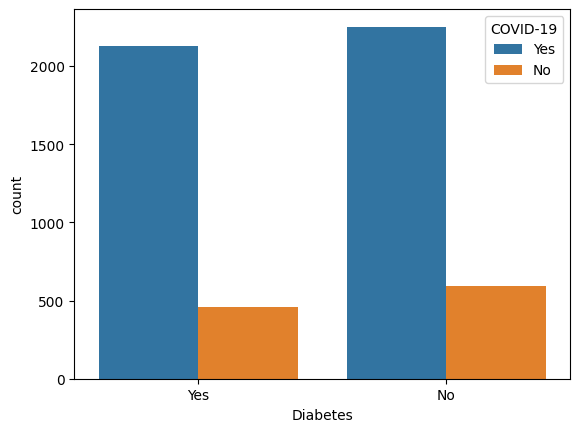

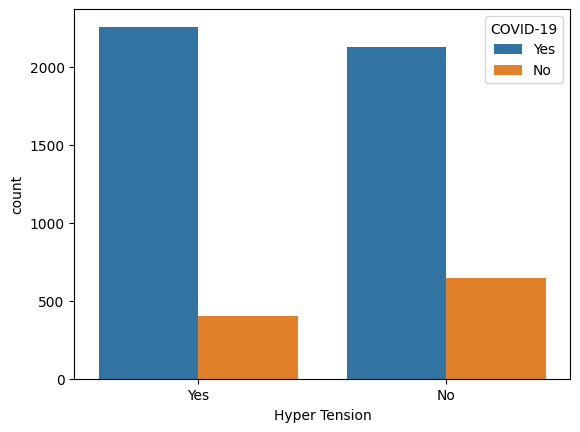

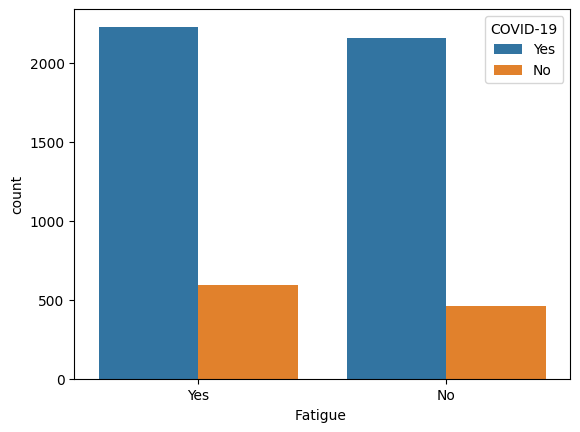

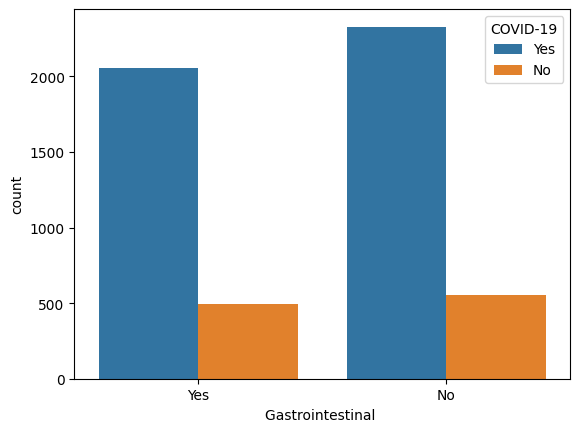

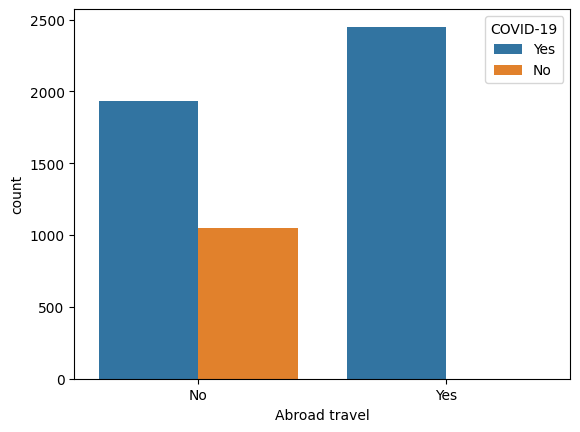

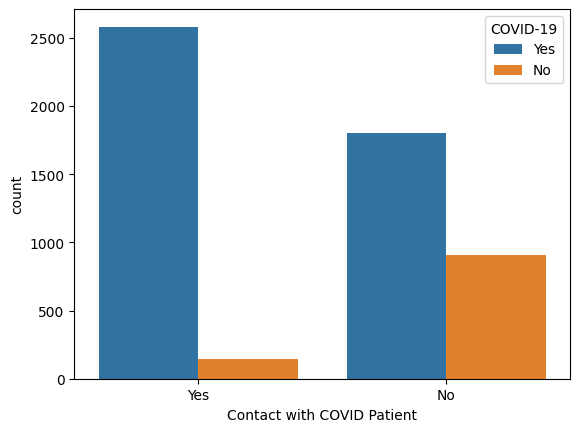

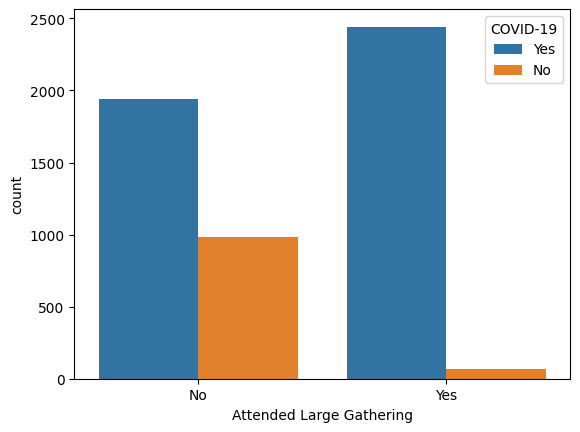

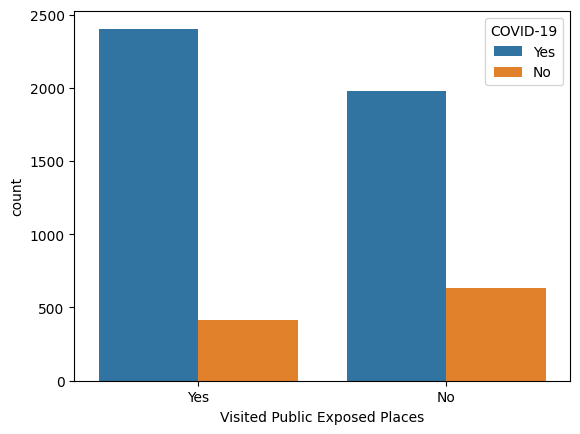

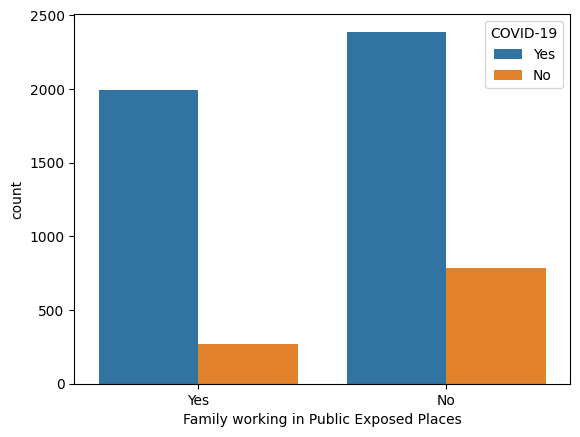

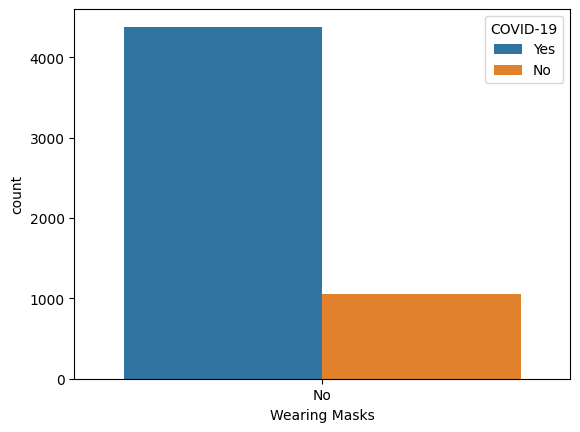

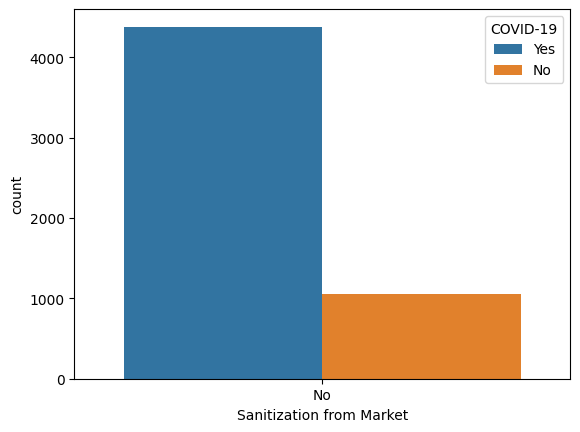

In [11]:
#Graph between features and target variable
for feature in features:
    plt.figure()
    sns.countplot(x= feature,hue='COVID-19',data=covid)
    plt.savefig('covi-1.png')

# **Observations from above Plots:**
1. Breathing problem: Presence of Breathing problem ('Yes') does seem to have an impact among covid positive patience
2. Fever: Presence of Fever ('yes') is also very common among covid positive patients 3.Dry Cough: Covid positive people are mostly suffering with Dry Cough
3. Sore throat: Covid postive people are also suffering from Sore throat
4. Hypertension: Presence or absense of Hypertension doesn't seem to have any distinct impact
5. Abroad travel: Although postive patients are there who haven't had any abroad travel, but if a person is having abroad travel, there is almost full chance that the person will have covid-19
6. Contact with COVID Patients: people with contact with covid patients are having more chances of being covid positive
7. Attended Large Gathering: People who have attended large gatherings, are more probable of getting covid
8. Visited public explosed places and family working in public exposed places, although have high positive rate, but doesn't seem to have any greater impact then those who are not exposed to such public places
9. Wearing mask and Sanitization from market has only one category i.e., No.

# **Feature Transformation**

In [12]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [13]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [14]:
#Checking Null Value
covid.isnull()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
covid.dtypes.value_counts()

int64    21
Name: count, dtype: int64

In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

# **Finding Correlation Between Features**

In [17]:
correlation=covid.corr()
correlation.style.background_gradient(cmap='PiYG',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


**Choosing those featuers which are somehow correlated to COVID-19 positive (i.e.,correlation > 0.1)**

So deleting some feature like: Running Nose, Asthma, Chronic Lung Disease, Headache, Heart Disease, Diabetes, Fatigue, Gastrointestinal, Wearing Masks, Sanitization from Market.

In [18]:
#Removing unnecessary features
covid=covid.drop('Running Nose',axis=1)
covid=covid.drop('Asthma',axis=1)
covid=covid.drop('Chronic Lung Disease',axis=1)
covid=covid.drop('Headache',axis=1)
covid=covid.drop('Heart Disease',axis=1)
covid=covid.drop('Diabetes',axis=1)
covid=covid.drop('Fatigue ',axis=1)
covid=covid.drop('Gastrointestinal ',axis=1)
covid=covid.drop('Wearing Masks',axis=1)
covid=covid.drop('Sanitization from Market',axis=1)

In [19]:
cov = covid
cov.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1


In [20]:
#Correlation after removing unnecessary features
correlation=cov.corr()
correlation.style.background_gradient(cmap='PiYG',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


In [21]:
cov.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,0,1,0,1


# **Data Splitting and Machine Learning**

In [22]:
x=cov.drop('COVID-19',axis=1)
y=cov['COVID-19']

In [23]:
#Train-Test Split Validation (Ratio 75:25)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4075, 10) (1359, 10) (4075,) (1359,)


In [25]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### **1. Logistic Regression**

In [26]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.52%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.893204     0.983390  0.965153     0.938297      0.965906
recall       0.931646     0.973212  0.965153     0.952429      0.965153
f1-score     0.912020     0.978274  0.965153     0.945147      0.965430
support    790.000000  3285.000000  0.965153  4075.000000   4075.000000
_______________________________________________
Confusion Matrix: 
 [[ 736   54]
 [  88 3197]]

Test Result:
Accuracy Score: 96.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.895131     0.979853  0.963208     0.937492      0.963582
recall       0.915709     0.974499  0.963208     0.945104      0.963208
f1-score     0.905303     0.977169  0.963208     0.941236      0.963367
support    261.000000  1098.000000  0.963

#### **2. Decision Tree Classifer**

In [27]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.939009     0.984489  0.975706     0.961749      0.975672
recall       0.935443     0.985388  0.975706     0.960416      0.975706
f1-score     0.937223     0.984938  0.975706     0.961080      0.975688
support    790.000000  3285.000000  0.975706  4075.000000   4075.000000
_______________________________________________
Confusion Matrix: 
 [[ 739   51]
 [  48 3237]]

Test Result:
Accuracy Score: 97.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.926923     0.981802  0.971302     0.954362      0.971262
recall       0.923372     0.982696  0.971302     0.953034      0.971302
f1-score     0.925144     0.982249  0.971302     0.953696      0.971281
support    261.000000  1098.000000  0.971

#### **3. Random Forest Classifier**

In [28]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.955204     0.980398  0.975706     0.967801      0.975514
recall       0.917722     0.989650  0.975706     0.953686      0.975706
f1-score     0.936088     0.985002  0.975706     0.960545      0.975519
support    790.000000  3285.000000  0.975706  4075.000000   4075.000000
_______________________________________________
Confusion Matrix: 
 [[ 725   65]
 [  34 3251]]

Test Result:
Accuracy Score: 97.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.948413     0.980126  0.974246     0.964270      0.974036
recall       0.915709     0.988160  0.974246     0.951935      0.974246
f1-score     0.931774     0.984127  0.974246     0.957950      0.974072
support    261.000000  1098.000000  0.974

#### **4. XGB(GRadient Boosting Classifier)**

In [29]:
xgb_clf = GradientBoostingClassifier(random_state = 12345)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.934866     0.982382  0.973252     0.958624      0.973170
recall       0.926582     0.984475  0.973252     0.955529      0.973252
f1-score     0.930706     0.983427  0.973252     0.957066      0.973206
support    790.000000  3285.000000  0.973252  4075.000000   4075.000000
_______________________________________________
Confusion Matrix: 
 [[ 732   58]
 [  51 3234]]

Test Result:
Accuracy Score: 96.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.933071     0.978281  0.969831     0.955676      0.969598
recall       0.908046     0.984517  0.969831     0.946282      0.969831
f1-score     0.920388     0.981389  0.969831     0.950889      0.969674
support    261.000000  1098.000000  0.969

## **Testing**

In [35]:
new

Breathing Problem                          1
Fever                                      1
Dry Cough                                  1
Sore throat                                1
Hyper Tension                              1
Abroad travel                              0
Contact with COVID Patient                 1
Attended Large Gathering                   1
Visited Public Exposed Places              1
Family working in Public Exposed Places    0
Name: 5145, dtype: int64

In [30]:
new = X_test.iloc[0]
a = np.asarray(new)
a = a.reshape(1,-1)
p = lr_clf.predict(a)

In [31]:
if (p[0] == 1):
    print("Person is affected by Covid 19 and is at risk of dying")
else:
    print("Great! the results are negative and you don't have to worry")

Person is affected by Covid 19 and is at risk of dying


In [32]:
import pickle

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

pickle.dump(best_model, open("covid_model.pkl", "wb"))